# **Advanced Regression - House Price Prediction Assignment**

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

### Objective

- We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Import the required libraries

In [1]:
# Supress and Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [112]:
# Import required libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
#Pandas display settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load and understand the data

In [5]:
# Read the CSV data
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Describe the data
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [10]:
# Shape of dataframe
df.shape

(1460, 81)

In [12]:
# Check if there are columns with one unique value
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [9]:
# Check the columns for null values

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [18]:
len(df.index)

1460

In [22]:
# Calculate the null % of all the columns and store in a pandas df 
df_null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
df_null.index.name = 'Features'

# Clean the null % df by selecting only the columns which have null values
df_null = df_null[df_null["Null %"] > 0]
df_null

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [23]:
# Drop the 'PoolQC', 'MiscFeature', 'Alley', 'Fence' and 'FireplaceQu' columns becuase there are so many missing values
# Drop id column because it is not required for further analysis

df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id'],axis=1)

In [24]:
# Recheck the df for null values

# Calculate the null % of all the columns and store in a pandas df 
df_null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
df_null.index.name = 'Features'

# Clean the null % df by selecting only the columns which have null values
df_null = df_null[df_null["Null %"] > 0]
df_null

,Null %
Features,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


### Observe the value counts of the columns with highest percentage of missing values

In [28]:
print("LotFrontage")
print('-'*50)
df['LotFrontage'].value_counts()

LotFrontage
--------------------------------------------------


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [29]:
print("GarageCond")
print('-'*50)
df['GarageCond'].value_counts()

GarageCond
--------------------------------------------------


TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [30]:
print("GarageType")
print('-'*50)
df['GarageType'].value_counts()

GarageType
--------------------------------------------------


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [31]:
print("GarageYrBlt")
print('-'*50)
df['GarageYrBlt'].value_counts()

GarageYrBlt
--------------------------------------------------


2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [32]:
print("GarageFinish")
print('-'*50)
df['GarageFinish'].value_counts()

GarageFinish
--------------------------------------------------


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [33]:
print("GarageQual")
print('-'*50)
df['GarageQual'].value_counts()

GarageQual
--------------------------------------------------


TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [34]:
print("BsmtExposure")
print('-'*50)
df['BsmtExposure'].value_counts()

BsmtExposure
--------------------------------------------------


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [35]:
print("BsmtFinType1")
print('-'*50)
df['BsmtFinType1'].value_counts()

BsmtFinType1
--------------------------------------------------


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [36]:
print("BsmtFinType2")
print('-'*50)
df['BsmtFinType2'].value_counts()

BsmtFinType2
--------------------------------------------------


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [37]:
print("BsmtCond")
print('-'*50)
df['BsmtCond'].value_counts()

BsmtCond
--------------------------------------------------


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [38]:
print("BsmtQual")
print('-'*50)
df['BsmtQual'].value_counts()

BsmtQual
--------------------------------------------------


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [39]:
print("MasVnrArea")
print('-'*50)
df['MasVnrArea'].value_counts()

MasVnrArea
--------------------------------------------------


0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [40]:
print("MasVnrType")
print('-'*50)
df['MasVnrType'].value_counts()

MasVnrType
--------------------------------------------------


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [41]:
print("Electrical")
print('-'*50)
df['Electrical'].value_counts()

Electrical
--------------------------------------------------


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### Imputing the missing values columns

In [42]:
# LotFrontage column and GarageYrBlt - impute the missing values with the median as they contain outliers
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())


In [43]:
# for the following columns I will impute the null values with the mode
for col in ('GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Electrical'):
    df[col] = df[col].fillna(df[col].mode()[0])


In [46]:
# Confirm if any null value
df.isnull().values.any()

False

In [47]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [48]:
# Check the shape of the data
df.shape

(1460, 75)

In [49]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
print("PoolArea")
print('-'*50)
df['PoolArea'].value_counts()

PoolArea
--------------------------------------------------


0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [51]:
print("MiscVal")
print('-'*50)
df['MiscVal'].value_counts()

MiscVal
--------------------------------------------------


0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [52]:
print("3SsnPorch")
print('-'*50)
df['3SsnPorch'].value_counts()

3SsnPorch
--------------------------------------------------


0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

In [53]:
# Drop columns 'PoolArea','MiscVal', and '3SsnPorch' as they are dominated by one value
df = df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [54]:
df.shape

(1460, 72)

In [55]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


# EDA

### Outlier treatment

In [56]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

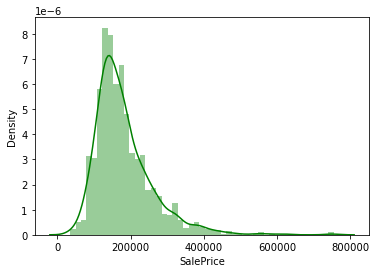

In [57]:
plt.figure()
sns.distplot(df['SalePrice'],color='g')
plt.show()

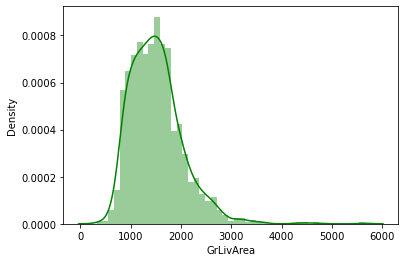

In [58]:
plt.figure()
sns.distplot(df['GrLivArea'],color='g')
plt.show()

In [59]:
# IQR to remove the outlier of numeric columns
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

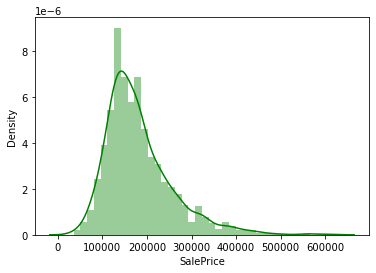

In [60]:
plt.figure()
sns.distplot(df['SalePrice'],color='g')
plt.show()

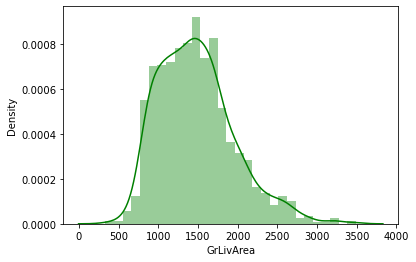

In [61]:
plt.figure()
sns.distplot(df['GrLivArea'],color='g')
plt.show()

In [62]:
# Rechecking the dataframe after removal of outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemo

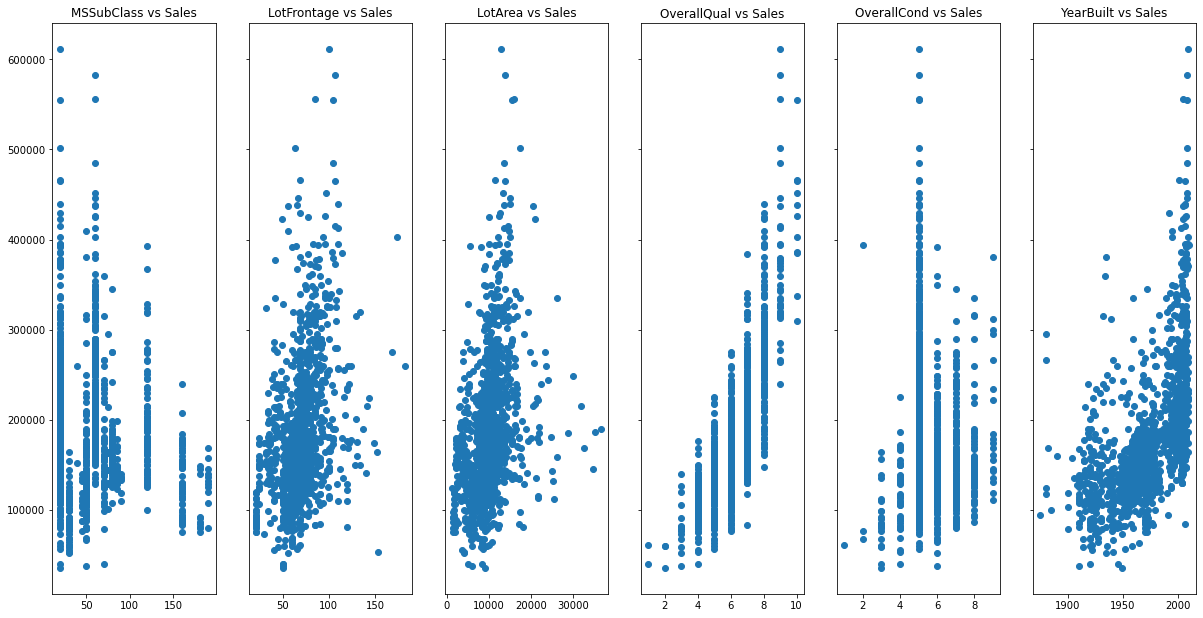

In [63]:
fig, ax = plt.subplots(ncols=6, sharey=True)

MSSubClass = ax[0].scatter(df['MSSubClass'], df['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales')

LotFrontage= ax[1].scatter(df['LotFrontage'], df['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[1].set_title('LotFrontage vs Sales')

LotArea = ax[2].scatter(df['LotArea'], df['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales')

OverallQual = ax[3].scatter(df['OverallQual'], df['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales')

OverallCond = ax[4].scatter(df['OverallCond'], df['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales')

YearBuilt = ax[5].scatter(df['YearBuilt'], df['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[5].set_title('YearBuilt vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

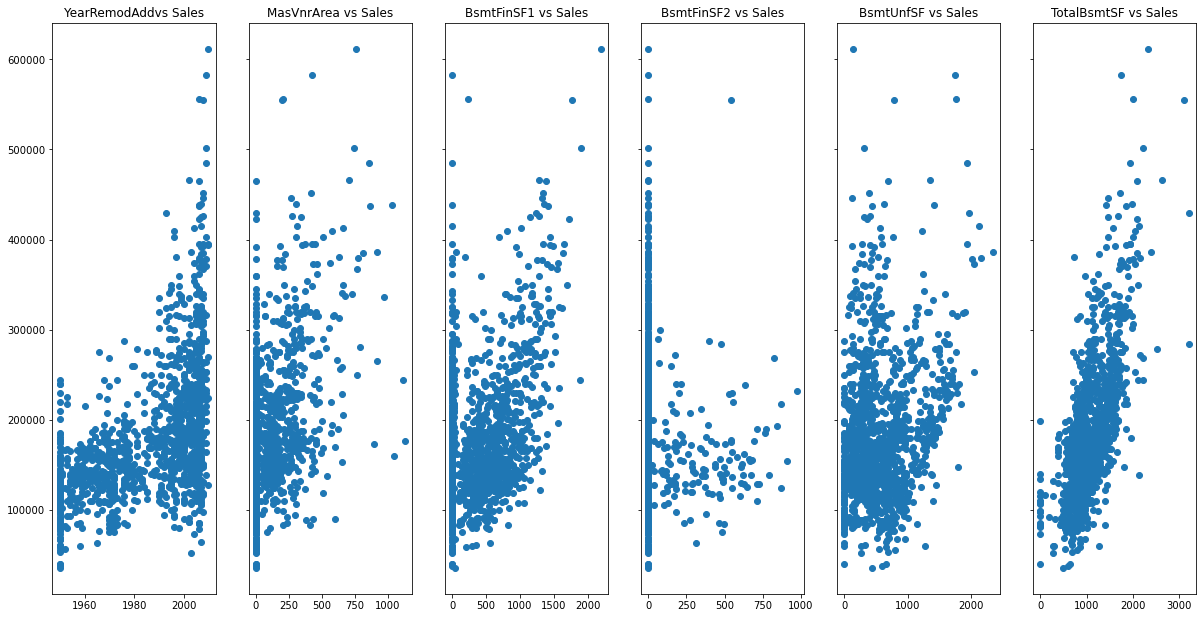

In [64]:
fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = ax[0].scatter(df['YearRemodAdd'], df['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[1].scatter(df['MasVnrArea'], df['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[2].scatter(df['BsmtFinSF1'], df['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[3].scatter(df['BsmtFinSF2'], df['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = ax[4].scatter(df['BsmtUnfSF'], df['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSF = ax[5].scatter(df['TotalBsmtSF'], df['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

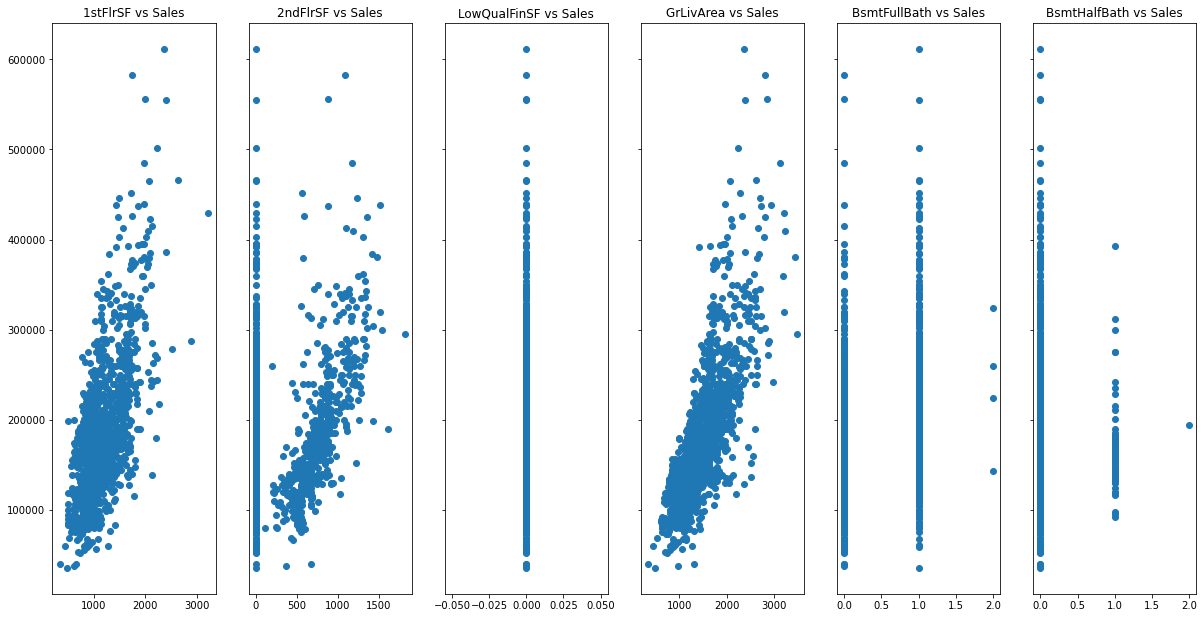

In [66]:
fig, ax = plt.subplots(ncols=6, sharey=True)

firstFlrSF = ax[0].scatter(df['1stFlrSF'], df['SalePrice'])
firstFlrSF.set_label("1stFlrSF")
ax[0].set_title('1stFlrSF vs Sales')

secondFlrSF= ax[1].scatter(df['2ndFlrSF'], df['SalePrice'])
secondFlrSF.set_label("2ndFlrSF")
ax[1].set_title('2ndFlrSF vs Sales')

LowQualFinSF = ax[2].scatter(df['LowQualFinSF'], df['SalePrice'])
LowQualFinSF.set_label("LowQualFinSF")
ax[2].set_title('LowQualFinSF vs Sales')

GrLivArea = ax[3].scatter(df['GrLivArea'], df['SalePrice'])
GrLivArea.set_label("GrLivArea")
ax[3].set_title('GrLivArea vs Sales')

BsmtFullBath = ax[4].scatter(df['BsmtFullBath'], df['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
ax[4].set_title('BsmtFullBath vs Sales')

BsmtHalfBath = ax[5].scatter(df['BsmtHalfBath'], df['SalePrice'])
BsmtHalfBath.set_label("BsmtHalfBath")
ax[5].set_title('BsmtHalfBath vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

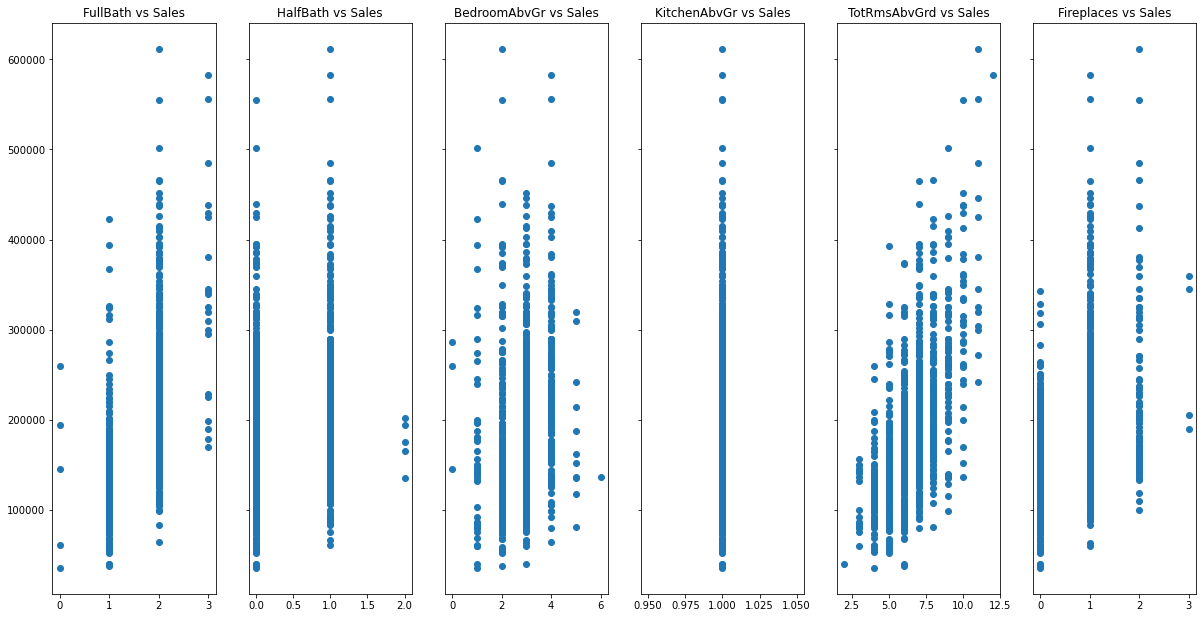

In [67]:
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(df['FullBath'], df['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(df['HalfBath'], df['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(df['BedroomAbvGr'], df['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[3].scatter(df['KitchenAbvGr'], df['SalePrice'])
KitchenAbvGr.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[4].scatter(df['TotRmsAbvGrd'], df['SalePrice'])
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs Sales')

Fireplaces = ax[5].scatter(df['Fireplaces'], df['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

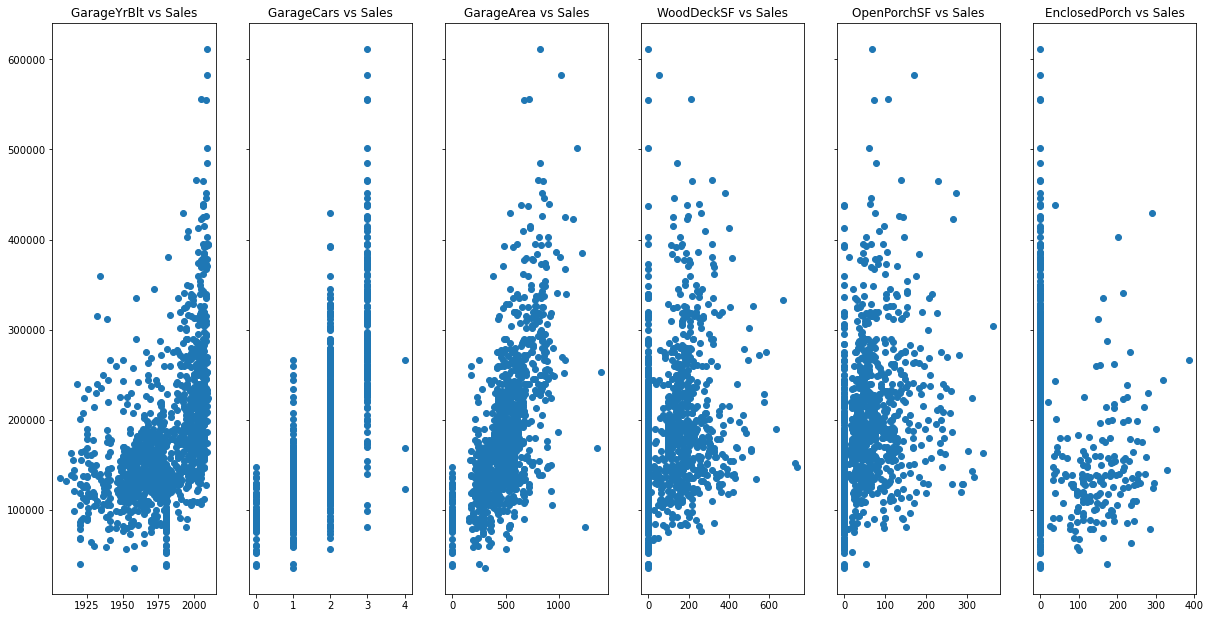

In [68]:
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(df['GarageYrBlt'], df['SalePrice'])
GarageYrBlt.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs Sales')

GarageCars= ax[1].scatter(df['GarageCars'], df['SalePrice'])
GarageCars.set_label("GarageCars")
ax[1].set_title('GarageCars vs Sales')

GarageArea = ax[2].scatter(df['GarageArea'], df['SalePrice'])
GarageArea.set_label("GarageArea")
ax[2].set_title('GarageArea vs Sales')

WoodDeckSF = ax[3].scatter(df['WoodDeckSF'], df['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[4].scatter(df['OpenPorchSF'], df['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(df['EnclosedPorch'], df['SalePrice'])
EnclosedPorch.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

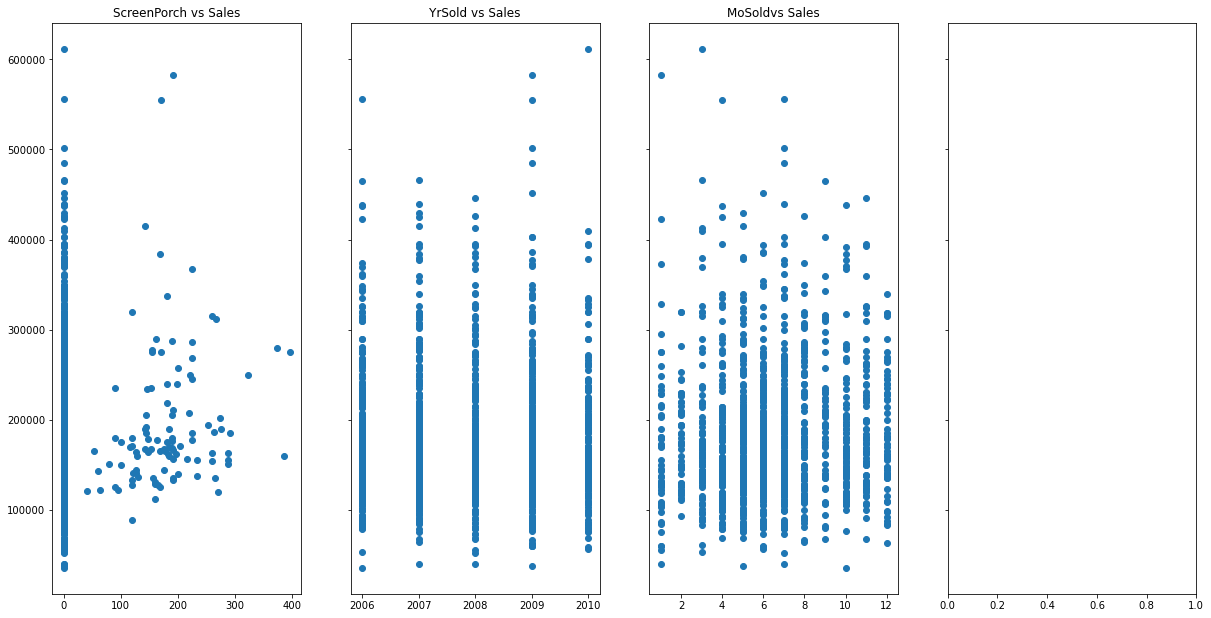

In [69]:
fig, ax = plt.subplots(ncols=4, sharey=True)


ScreenPorch= ax[0].scatter(df['ScreenPorch'], df['SalePrice'])
ScreenPorch.set_label("ScreenPorch")
ax[0].set_title('ScreenPorch vs Sales')

YrSold = ax[1].scatter(df['YrSold'], df['SalePrice'])
YrSold.set_label("YrSold")
ax[1].set_title('YrSold vs Sales')

MoSold = ax[2].scatter(df['MoSold'], df['SalePrice'])
MoSold.set_label("MoSold")
ax[2].set_title('MoSoldvs Sales')

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

### Another way to analyse categorical data

In [70]:
df_categorical = df[list(df.dtypes[df.dtypes=='object'].index)]
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [71]:

def categorical_df_plots(var, input_col,target_col):
    """
    Plots the graphical analysis of categorical features
    """
    plt.figure(var, figsize=(15,7))
    custom_order = df[[input_col,target_col]].groupby(by=[input_col])[target_col].median().sort_values(ascending=True)
    sns.boxplot(x=input_col, y=target_col, data=df[[input_col,target_col]], order=custom_order.index)
    plt.show()

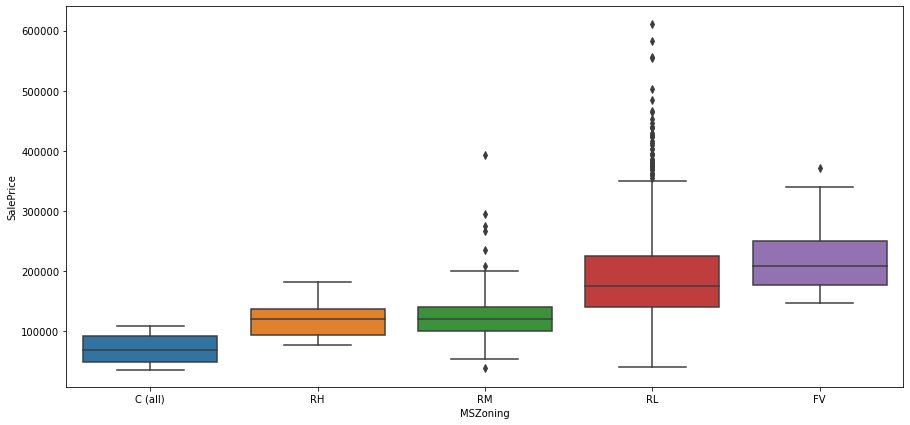

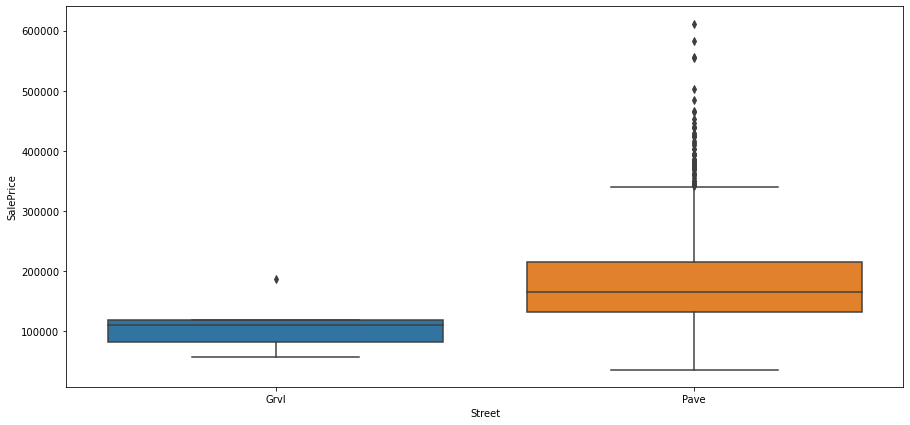

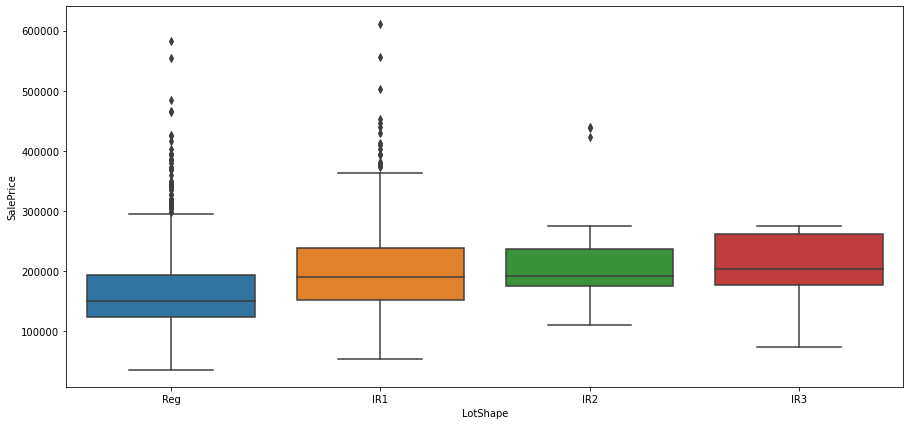

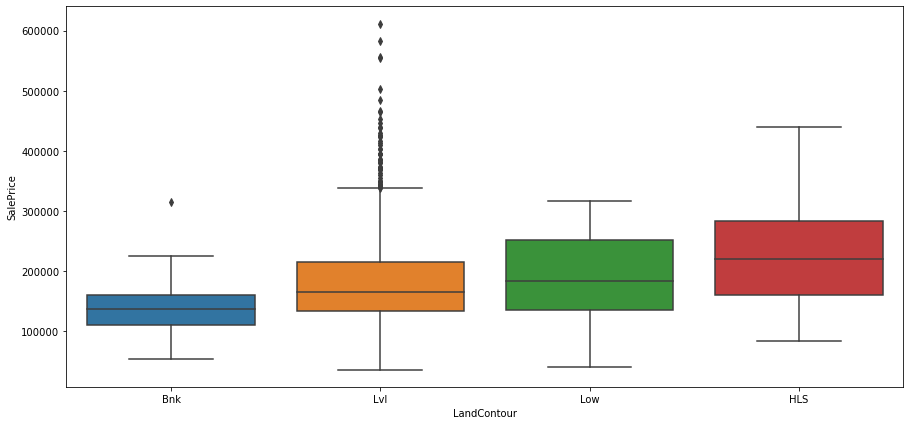

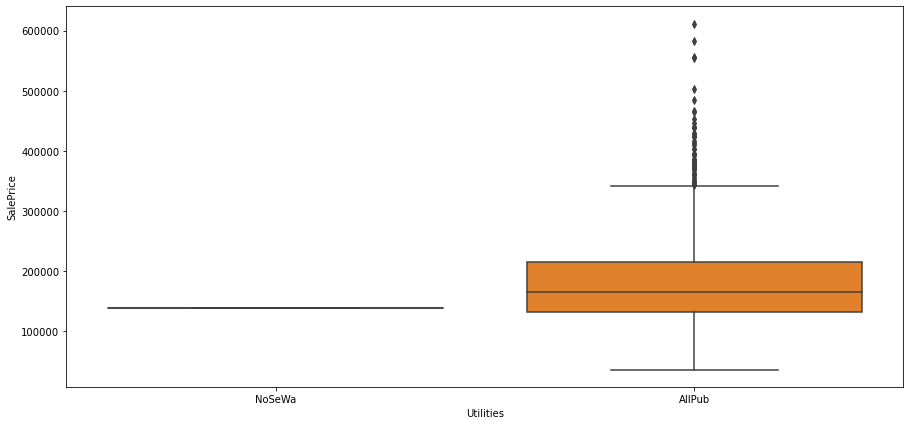

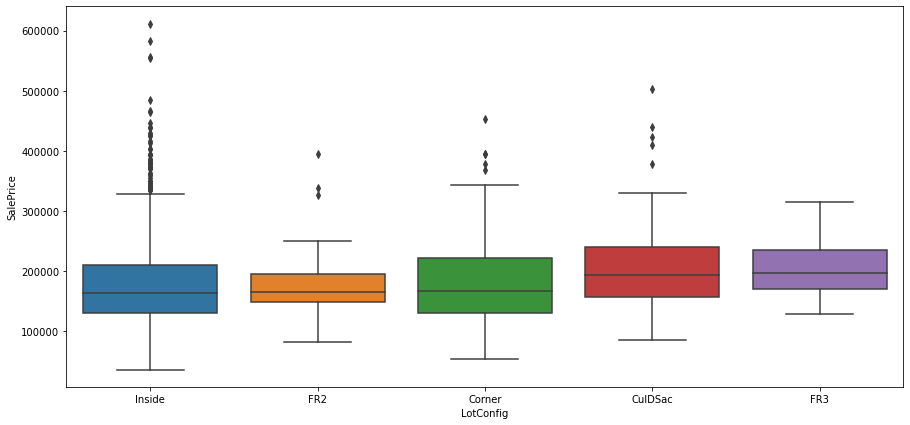

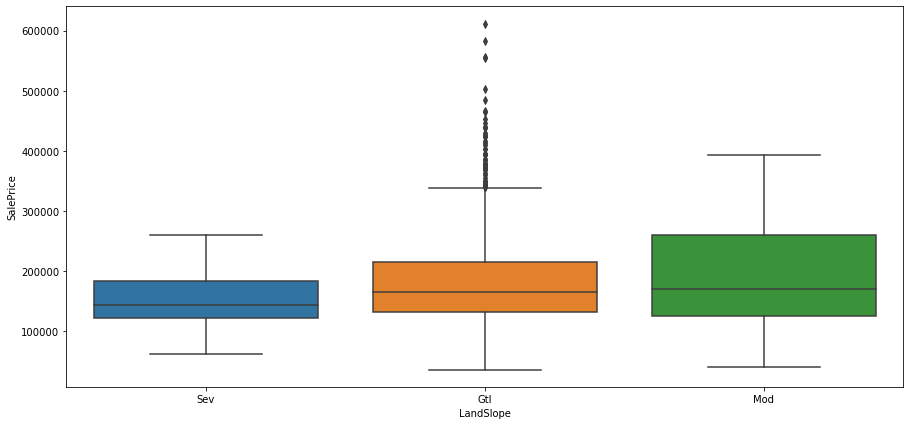

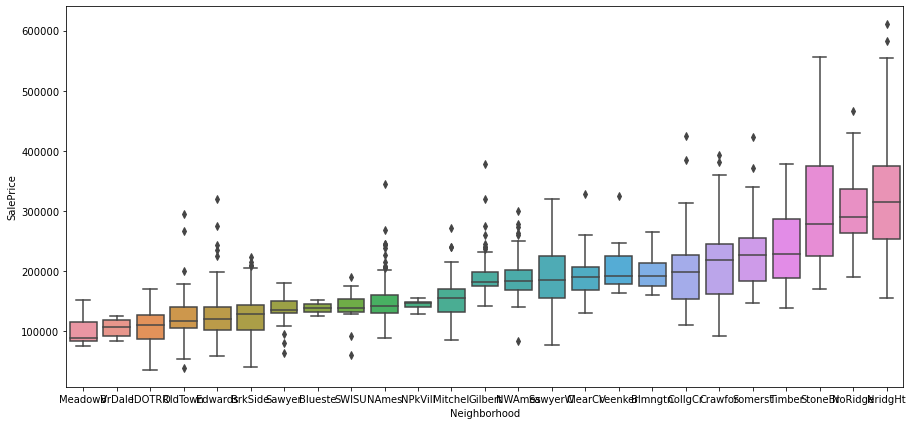

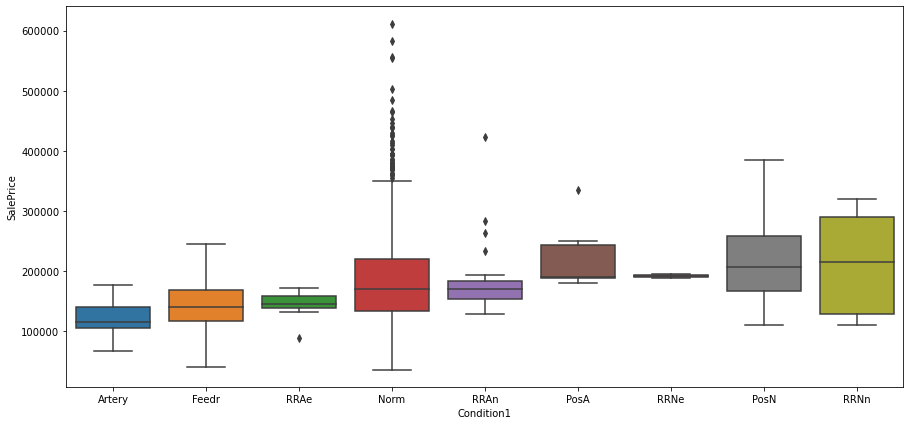

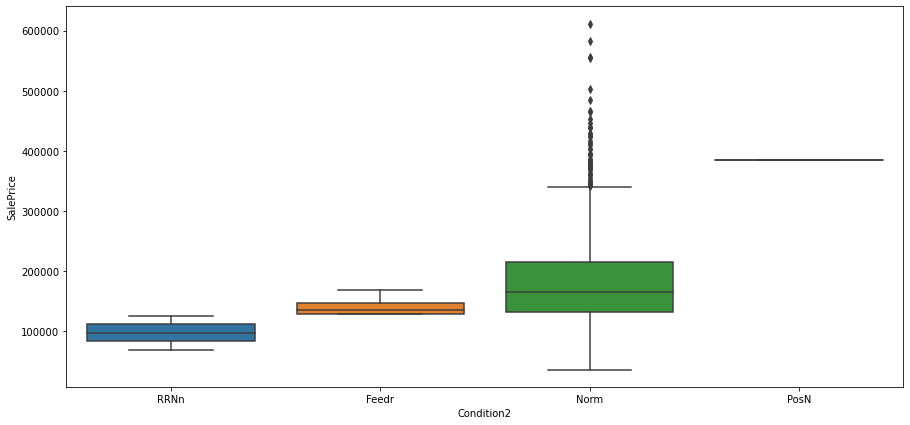

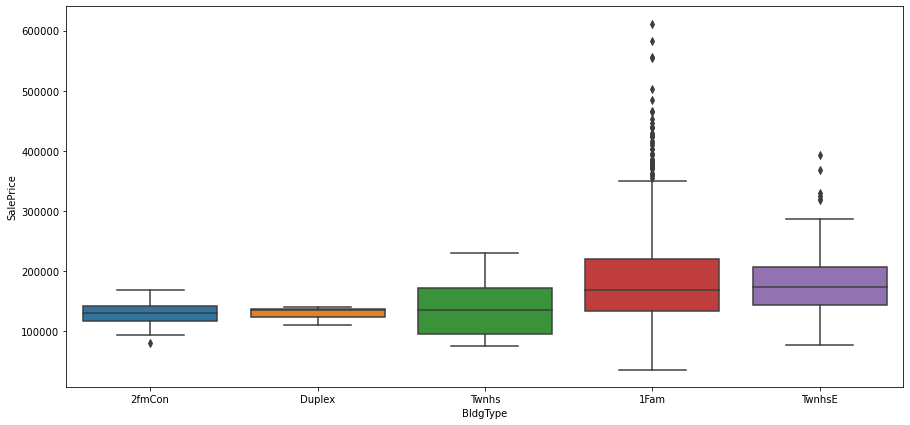

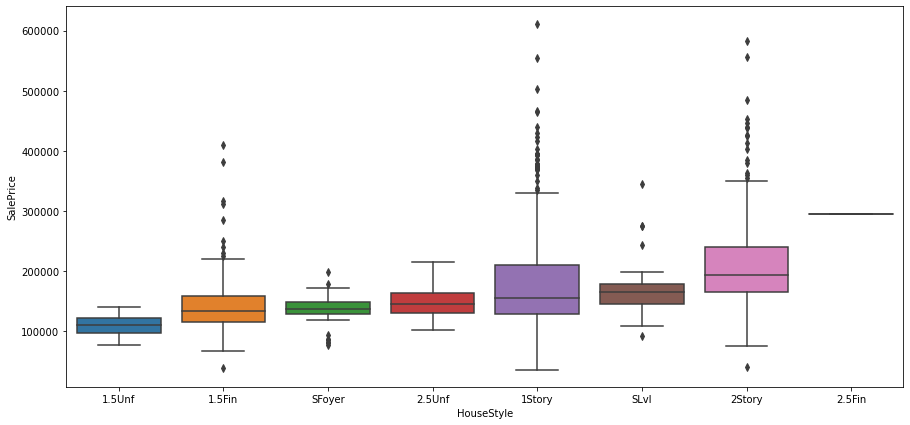

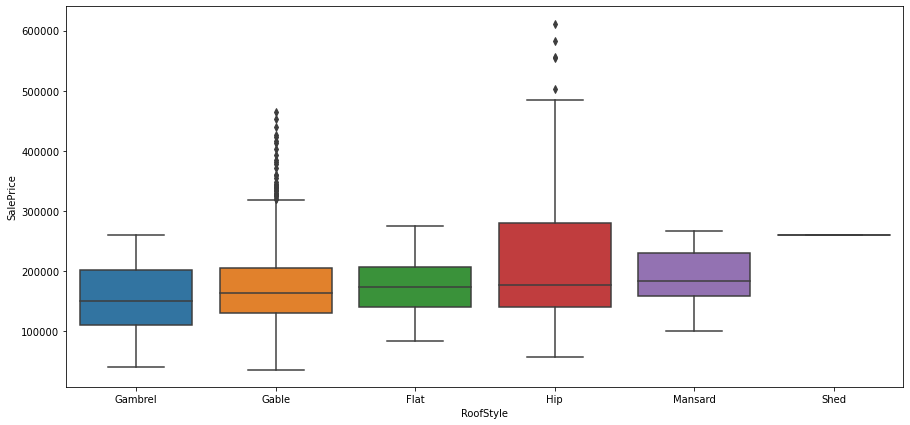

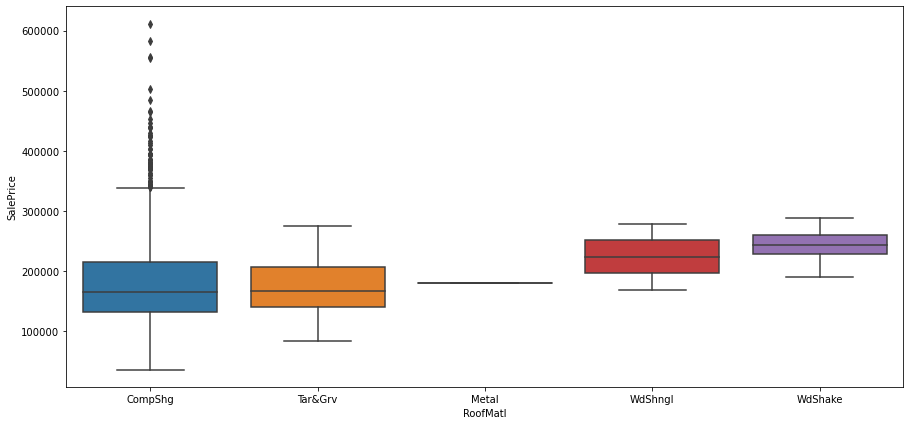

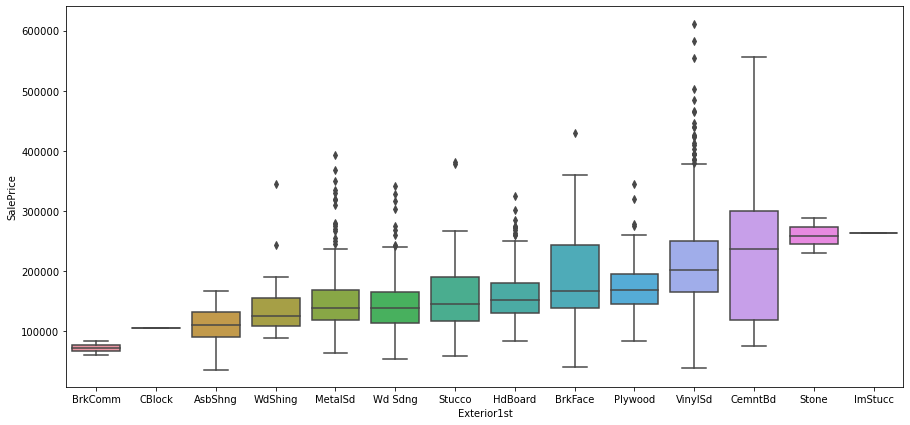

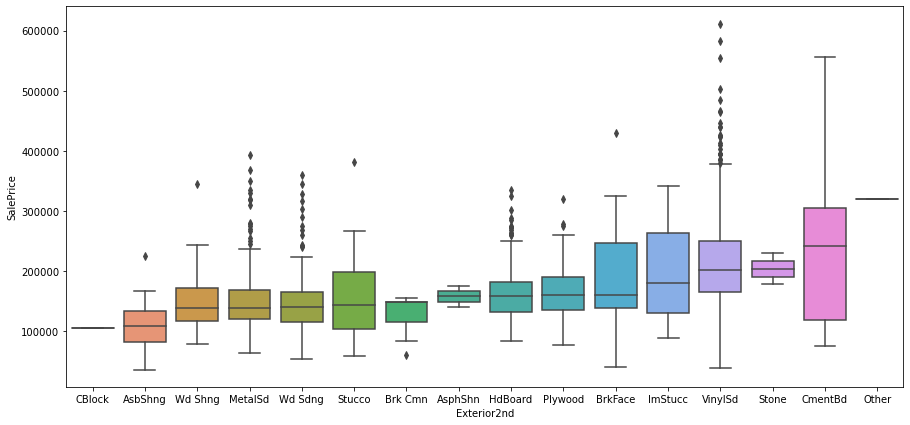

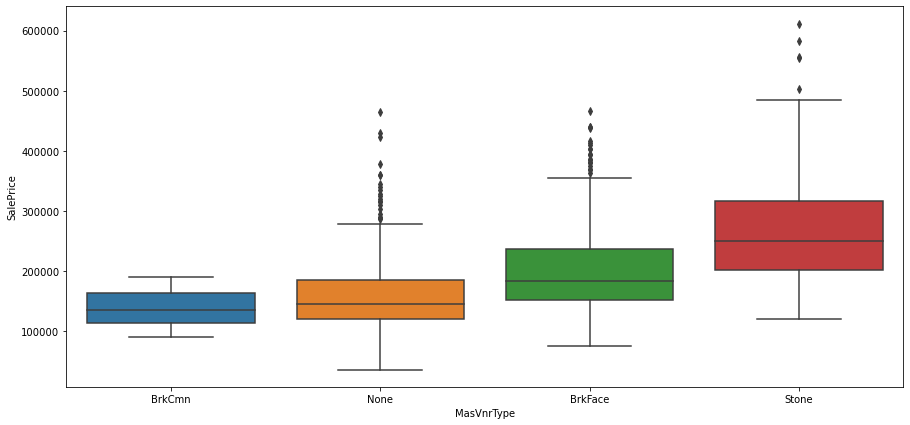

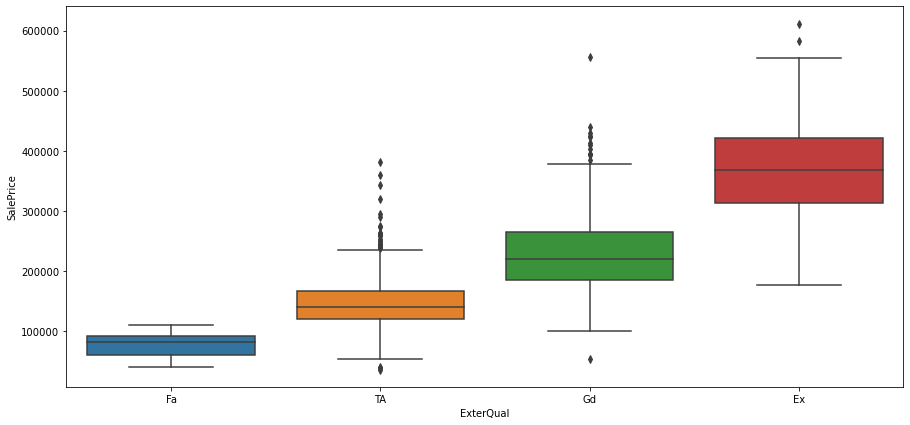

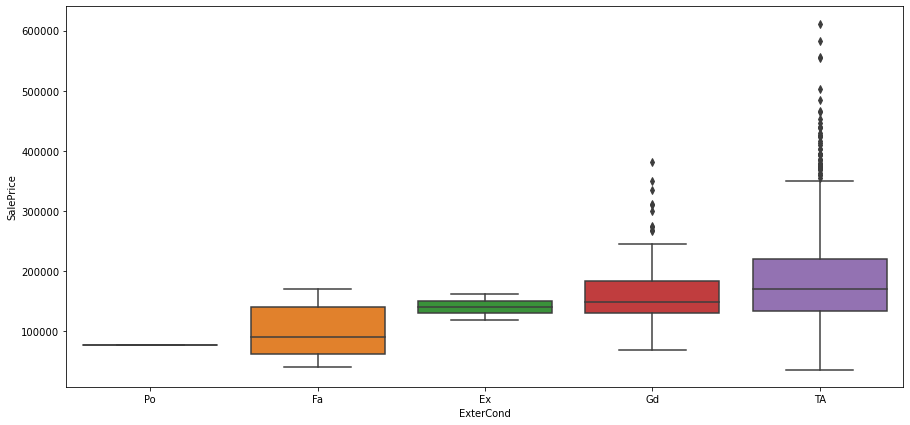

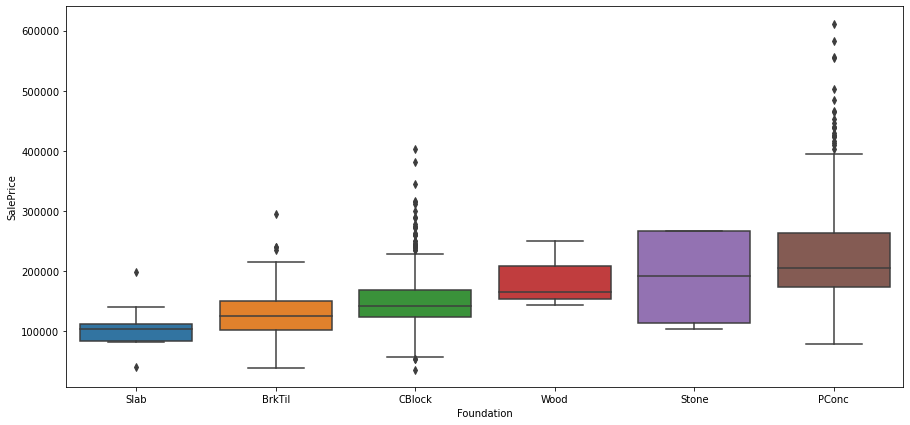

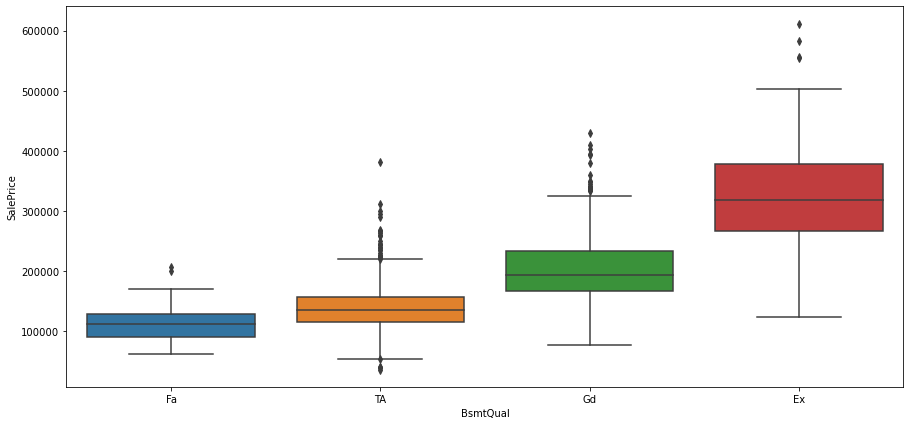

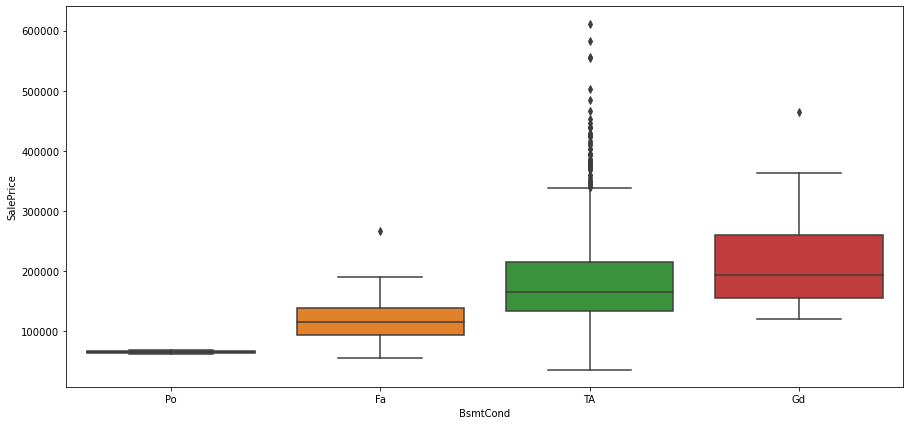

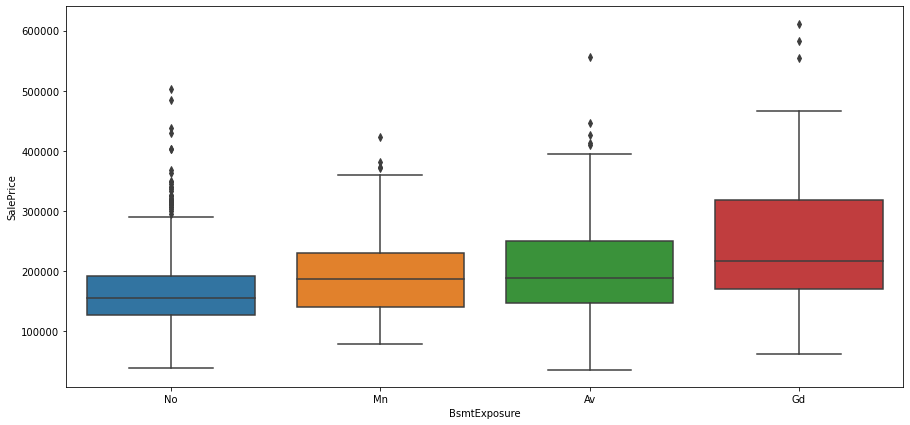

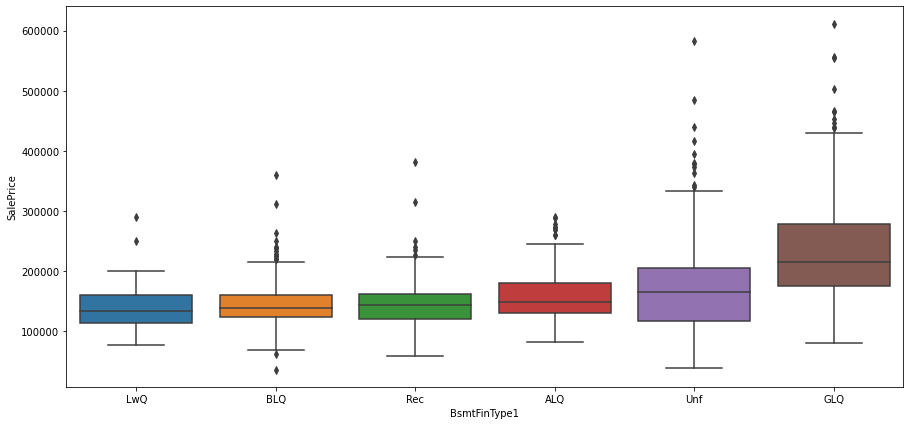

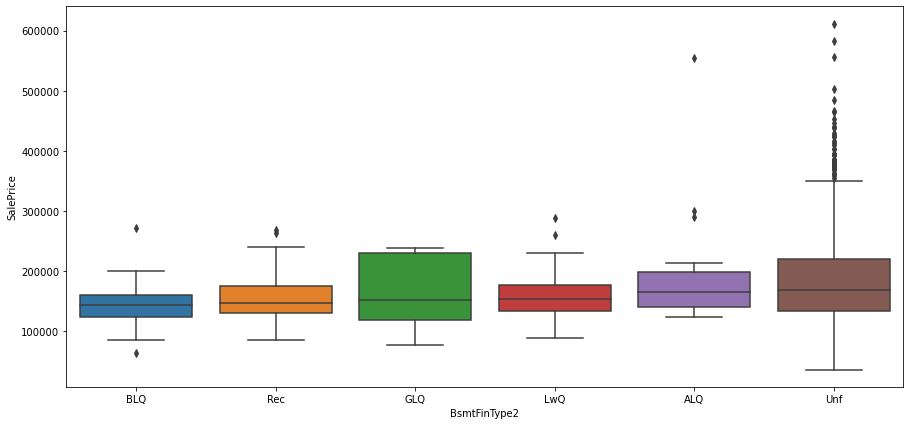

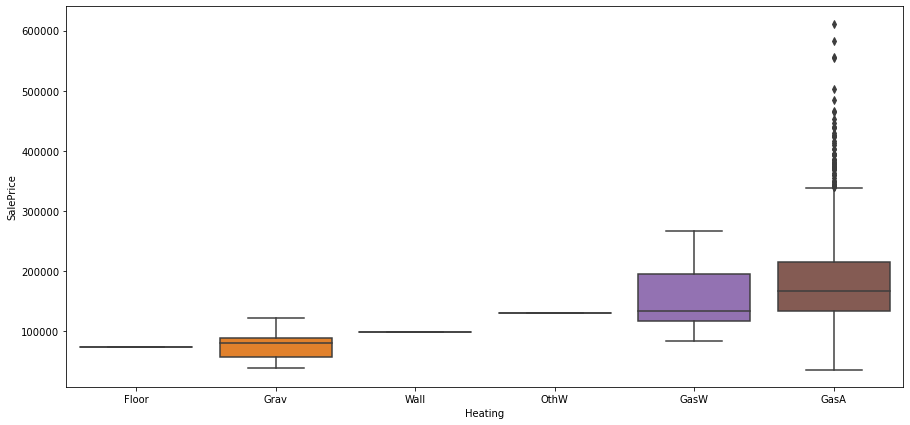

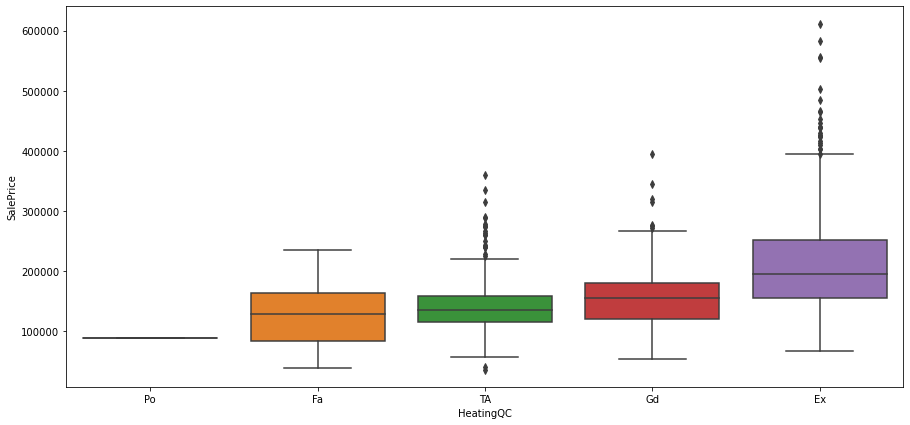

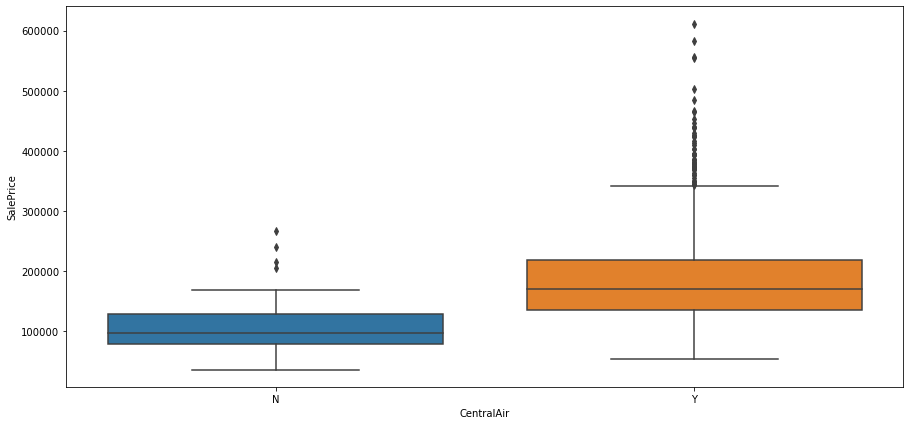

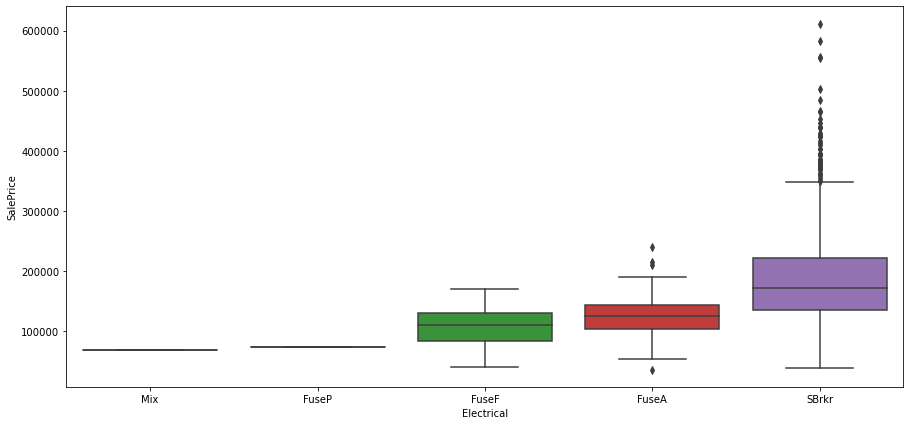

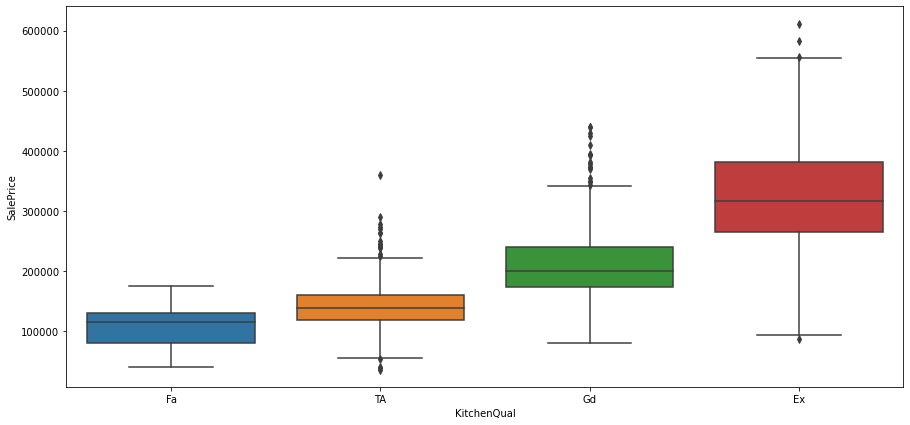

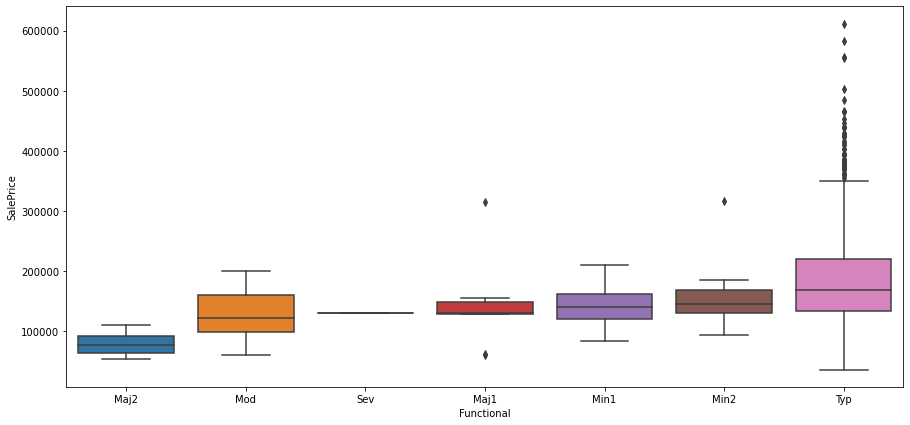

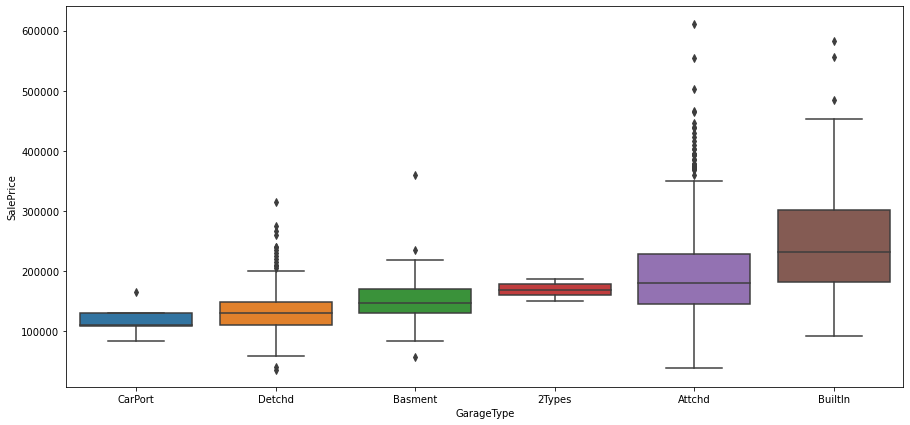

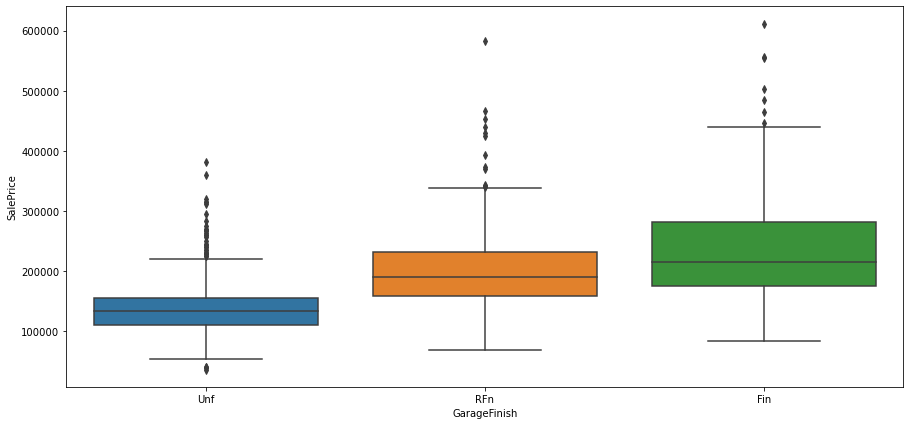

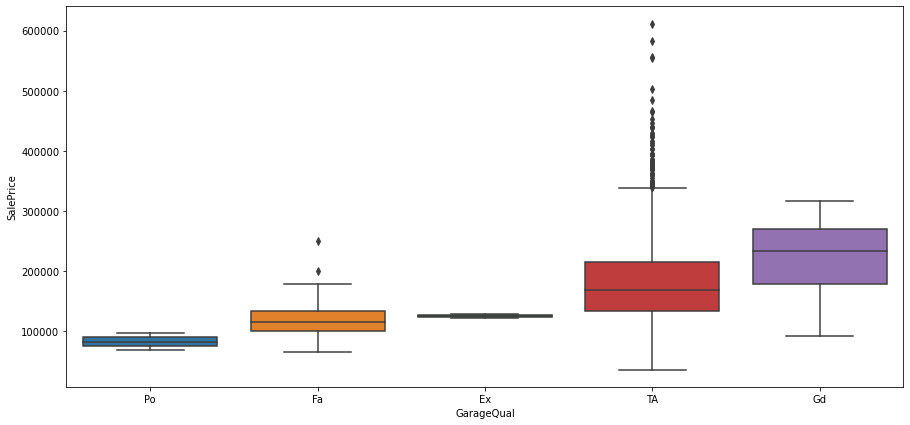

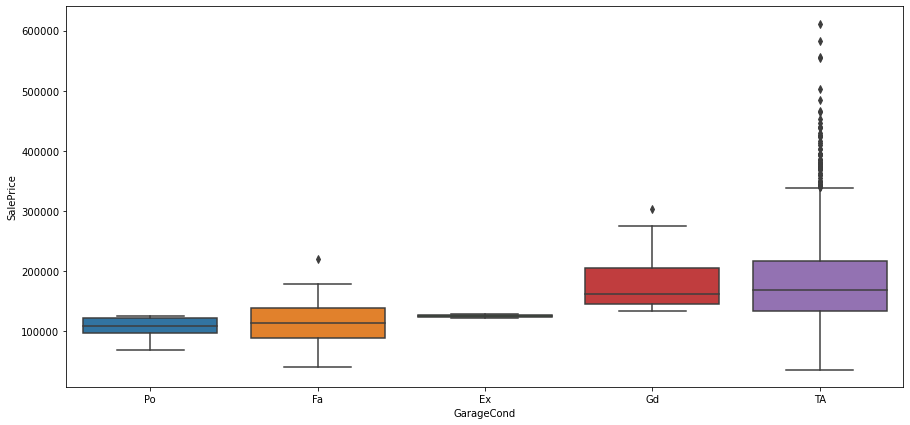

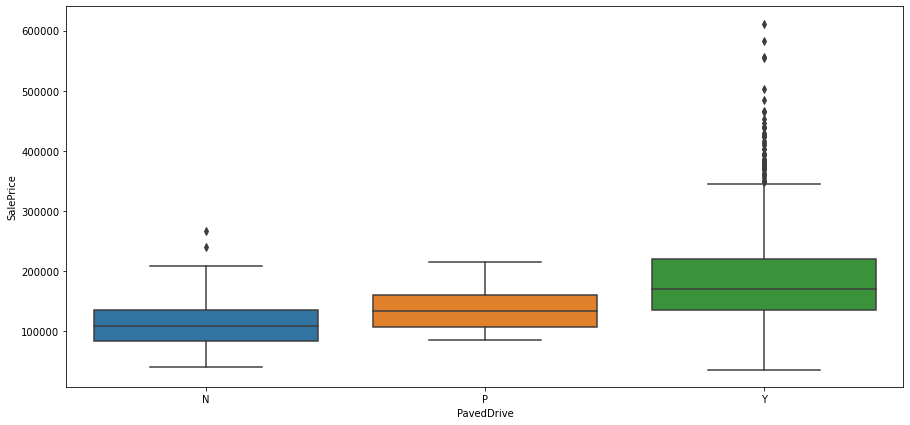

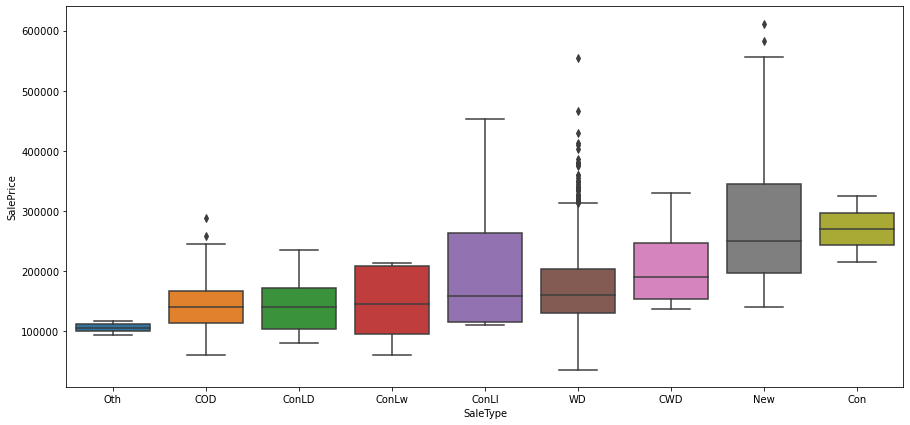

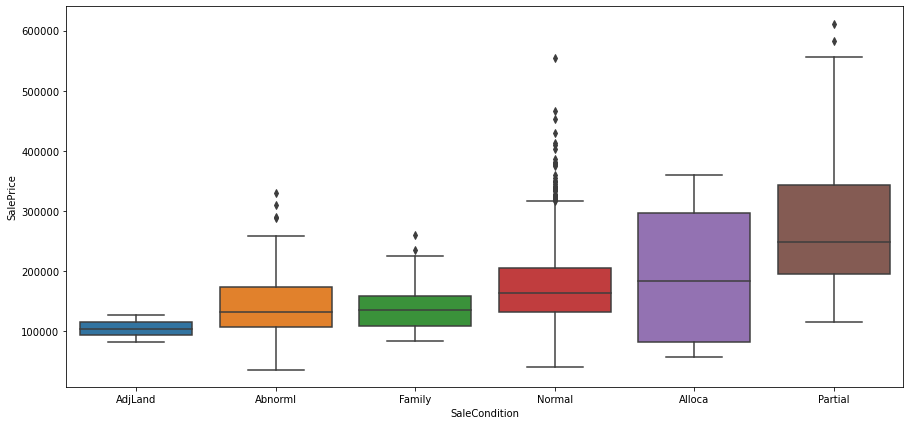

In [72]:
for var, col in enumerate(list(df_categorical.columns)):
    categorical_df_plots(var, col, 'SalePrice')

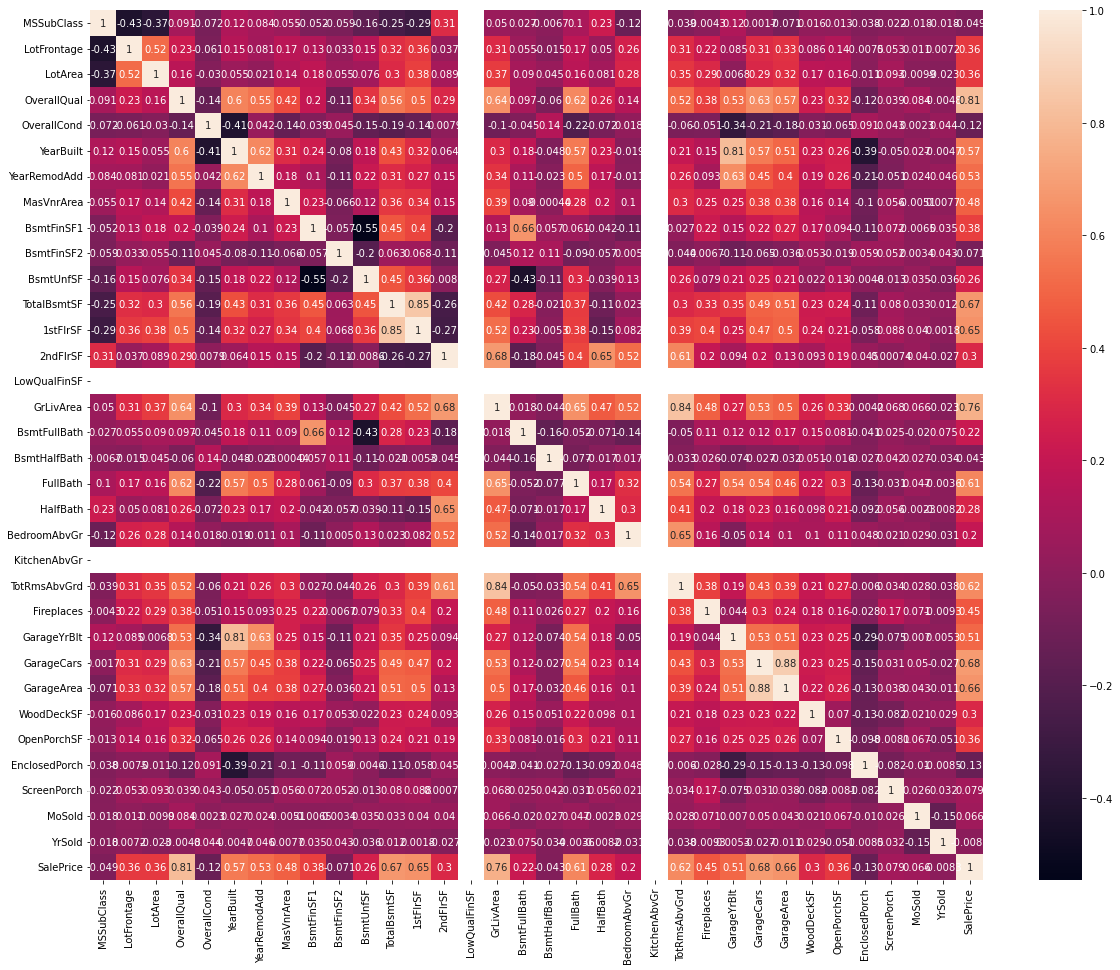

In [76]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

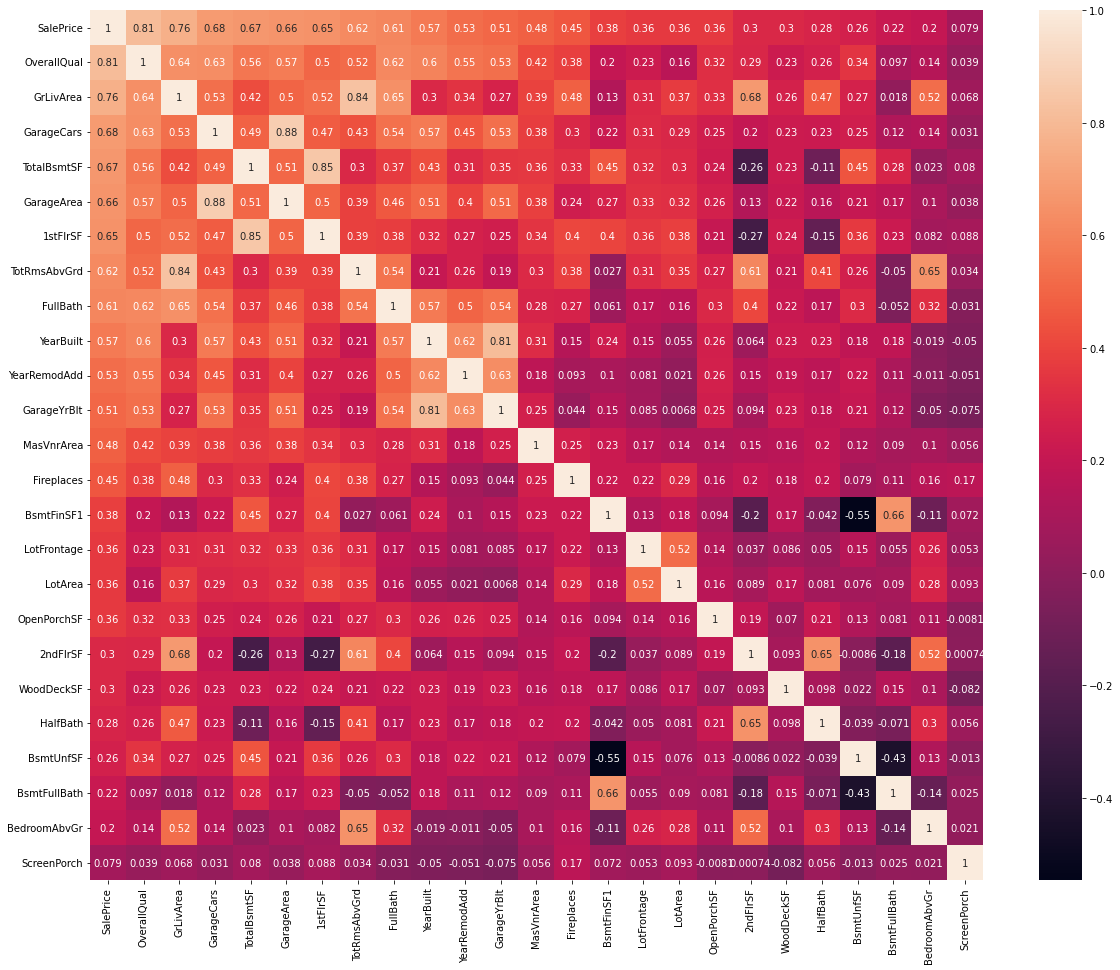

In [77]:
# correlation matrix for sales matrix
plt.figure(figsize = (20, 16))
n = 25 # number of variables which have the highest correlation with 'Sales price'

corrmat = df.corr()
cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(df[cols].corr(),annot=True)
plt.show()

**As clear from above heatmap that OverallQual, GrLivArea, GarageCars, TotalBsmtSF, GarageArea and 1stFlrSF are highly correlated to Sales Price**

# Dummy Variable

In [78]:
# Get Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [79]:
# Convert categorical value into Dummy variable
df = pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1

In [82]:
df.shape

(1333, 222)

# Model Building

### Splitting data into train and test

In [83]:
train,test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [84]:
y_train = np.log(train.SalePrice)
X_train = train.drop("SalePrice",1)

y_test= np.log(test.SalePrice)
X_test = test.drop("SalePrice",1)

### Scaling numerical variables of the dataset

In [85]:
numerical_values=X_train.select_dtypes(include=['int64','float64']).columns
numerical_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'], dtype='object')

In [90]:
scaler = StandardScaler()
X_train[numerical_values] = scaler.fit_transform(X_train[numerical_values])
X_test[numerical_values] = scaler.transform(X_test[numerical_values])

## Building the Regression Model

In [99]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [100]:
def get_significant_variables(model):
    """Get Model Parameters"""
    model_parameters = list(model.coef_)
    model_parameters.insert(0, reg.intercept_)
    model_parameters = [round(x, 2) for x in model_parameters]
    cols = train.columns
    cols = cols.insert(0, "constant")
    significant_vars=sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)
    return significant_vars

In [101]:
significant_var_reg = get_significant_variables(reg)

for a,b in sorted(significant_var_reg, reverse = True)[:15]:
    print(f'{b:40}Score: {a}')

KitchenAbvGr                            Score: 1042999806678.76
GrLivArea                               Score: 559703896579.38
BsmtUnfSF                               Score: 97146286676.89
BsmtFinSF1                              Score: 94960427657.59
LowQualFinSF                            Score: 61643805532.76
BsmtFinSF2                              Score: 29531198855.21
Exterior2nd_BrkFace                     Score: 18768763737.69
Electrical_FuseP                        Score: 17635770679.04
GarageCond_Gd                           Score: 14515223742.28
GarageCond_Po                           Score: 14515223742.12
GarageQual_TA                           Score: 14515223742.04
GarageCond_Fa                           Score: 14515223742.0
ExterCond_Gd                            Score: 160102134.54
Electrical_FuseF                        Score: 11993.06
constant                                Score: 10.74


## Calculate the RFE

In [103]:
rfe = RFE(reg, step=20)
rfe = rfe.fit(X_train, y_train)

In [110]:
col=X_train.columns[rfe.support_]
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking').head(30)

,Predictor,Status,Ranking
220,SaleCondition_Partial,True,1
80,Condition1_RRAn,True,1
140,ExterCond_Fa,True,1
78,Condition1_PosN,True,1
77,Condition1_PosA,True,1
76,Condition1_Norm,True,1
141,ExterCond_Gd,True,1
142,ExterCond_Po,True,1
143,ExterCond_TA,True,1
72,Neighborhood_StoneBr,True,1


## Build statsmodel of Linear REgression Model with all the variables selected by RFE

In [113]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

lr=sm.OLS(y_train,X_train_new)

**Model 1**

In [114]:
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     139.1
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:45:46   Log-Likelihood:                 900.86
No. Observations:                 933   AIC:                            -1604.
Df Residuals:                     834   BIC:                            -1125.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.9465      0.236     46.433      0.000      10.484      11.409
OverallQual               0.0547      0.007      8.347      0.000       0.042       0.068
OverallCond               0.0440      0.005      9.745      0.000       0.035       0.053
YearBuilt                 0.0477      0.010      4.930      0.000       0.029       0.067
BsmtFinSF1                0.0365      0.003     11.472      0.000       0.030       0.043
BsmtFinSF2                0.0082      0.004      2.230      0.026       0.001       0.015
BsmtUnfSF                -0.0028      0.003     -0.914      0.361      -0.009       0.003
TotalBsmtSF               0.0379      0.005      7.486      0.000       0.028       0.048
1stFlrSF                  0.0523      0.006      9.295      0.000       0.041       0.063
2ndFlrSF                  0.0545      0.003     16.238      0.000       0.048       0.061
LowQualFinSF          -8.289e-16    4.4e-16     -1.884      0.060   -1.69e-15    3.47e-17
GrLivArea                 0.0877      0.003     25.075      0.000       0.081       0.095
KitchenAbvGr           4.561e-15   8.27e-15      0.551      0.582   -1.17e-14    2.08e-14
GarageCars                0.0527      0.005      9.726      0.000       0.042       0.063
MSZoning_FV               0.5633      0.070      8.075      0.000       0.426       0.700
MSZoning_RH               0.5071      0.075      6.729      0.000       0.359       0.655
MSZoning_RL               0.5278      0.068      7.771      0.000       0.394       0.661
MSZoning_RM               0.4773      0.069      6.898      0.000       0.341       0.613
LotShape_IR3              0.0917      0.047      1.962      0.050   -1.49e-05       0.183
Utilities_NoSeWa         -0.0289      0.104     -0.278      0.781      -0.234       0.176
LotConfig_FR3            -0.0454      0.063     -0.721      0.471      -0.169       0.078
Neighborhood_BrDale      -0.0314      0.040     -0.786      0.432      -0.110       0.047
Neighborhood_BrkSide      0.0695      0.024      2.947      0.003       0.023       0.116
Neighborhood_Crawfor      0.1639      0.022      7.531      0.000       0.121       0.207
Neighborhood_Edwards     -0.0609      0.015     -4.065      0.000      -0.090      -0.032
Neighborhood_MeadowV     -0.1667      0.040     -4.178      0.000      -0.245      -0.088
Neighborhood_OldTown     -0.0295      0.021     -1.380      0.168      -0.071       0.012
Neighborhood_StoneBr      0.0624      0.026      2.422      0.016       0.012       0.113
Condition1_Norm           0.0784      0.013      6.123      0.000       0.053       0.104
Condition1_PosA           0.0473      0.054      0.871      0.384      -0.059       0.154
Condition1_PosN           0.0667      0.033      2.023      0.043       0.002       0.131
Condition1_RRAn        

### Ridge Regression

In [115]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

#cross validation

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 5.0}
-0.0761481956017633


### Cross Validation Results

In [117]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006752,2.784180e-03,0.002207,3.963894e-04,0.0001,{'alpha': 0.0001},-0.087955,-0.088105,-0.083991,-0.078162,-0.101609,-0.087964,0.007721,26,-0.055740,-0.055915,-0.055425,-0.056912,-0.051125,-0.055023,0.002012
1,0.004922,5.178058e-04,0.002000,2.611745e-07,0.001,{'alpha': 0.001},-0.087504,-0.087957,-0.083874,-0.078141,-0.101527,-0.087801,0.007710,25,-0.055770,-0.055923,-0.055446,-0.056915,-0.051132,-0.055037,0.002013
2,0.004735,3.993956e-04,0.001800,4.000256e-04,0.01,{'alpha': 0.01},-0.084496,-0.087357,-0.083077,-0.077945,-0.100820,-0.086739,0.007674,24,-0.056152,-0.056022,-0.055647,-0.056953,-0.051208,-0.055196,0.002039
3,0.004600,4.895709e-04,0.001999,8.609519e-07,0.05,{'alpha': 0.05},-0.080854,-0.086102,-0.080948,-0.077398,-0.098786,-0.084818,0.007517,23,-0.056977,-0.056284,-0.056217,-0.057089,-0.051553,-0.055624,0.002066
4,0.005183,3.684082e-04,0.002224,5.026977e-04,0.1,{'alpha': 0.1},-0.080105,-0.084919,-0.078988,-0.076902,-0.097238,-0.083630,0.007295,22,-0.057477,-0.056527,-0.056700,-0.057264,-0.051941,-0.055982,0.002050
5,0.004002,6.330177e-04,0.002139,9.987366e-04,0.2,{'alpha': 0.2},-0.079852,-0.083096,-0.076478,-0.076158,-0.095434,-0.082203,0.007081,21,-0.058086,-0.056943,-0.057379,-0.057683,-0.052629,-0.056544,0.001993
6,0.004479,4.496106e-04,0.002010,1.988897e-05,0.3,{'alpha': 0.3},-0.079227,-0.081714,-0.074905,-0.075681,-0.094469,-0.081199,0.007075,20,-0.058479,-0.057268,-0.057943,-0.058094,-0.053194,-0.056995,0.001941
7,0.004599,4.889565e-04,0.002000,5.761645e-07,0.4,{'alpha': 0.4},-0.078589,-0.080843,-0.073832,-0.075358,-0.093845,-0.080493,0.007110,18,-0.058843,-0.057540,-0.058385,-0.058438,-0.053635,-0.057368,0.001914
8,0.004601,4.893376e-04,0.002116,2.330542e-04,0.5,{'alpha': 0.5},-0.077983,-0.080137,-0.073352,-0.075058,-0.093381,-0.079982,0.007096,17,-0.059170,-0.057791,-0.058753,-0.058754,-0.054008,-0.057695,0.001899
9,0.004800,4.000913e-04,0.001599,4.899404e-04,0.6,{'alpha': 0.6},-0.077398,-0.079543,-0.073051,-0.074783,-0.093063,-0.079568,0.007102,16,-0.059446,-0.058003,-0.059067,-0.059030,-0.054327,-0.057975,0.001885


### Plot mean test and train scores with alpha

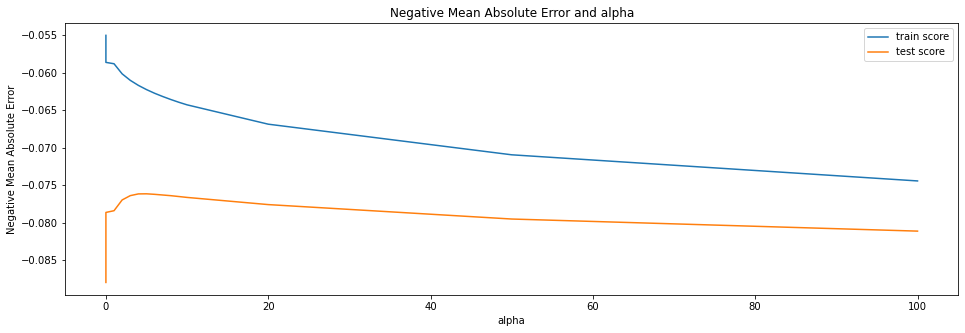

In [118]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Final Ridge Model

In [119]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=5)

### Predict R-squared value on train data

In [120]:
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9441842885600625


### Predict R-squared value on test data

In [121]:
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9249247546927695


In [122]:
# RMSE
mean_squared_error(y_test, y_test_pred)

0.01232538589911057

In [127]:
significant_vars_ridge=get_significant_variables(ridge)
significant_vars_ridge.pop(0)
for a,b in sorted(significant_vars_ridge, reverse = True)[:15]:
    print(f'{b:40}Score: {a}')

Neighborhood_CollgCr                    Score: 0.12
SalePrice                               Score: 0.08
SaleCondition_Family                    Score: 0.08
Neighborhood_Somerst                    Score: 0.08
SaleCondition_Normal                    Score: 0.07
GrLivArea                               Score: 0.07
Functional_Sev                          Score: 0.07
Foundation_CBlock                       Score: 0.07
OverallQual                             Score: 0.06
MSZoning_RH                             Score: 0.06
Condition1_Feedr                        Score: 0.06
OverallCond                             Score: 0.05
MSZoning_RM                             Score: 0.05
HeatingQC_TA                            Score: 0.05
BsmtCond_TA                             Score: 0.05


## **Ridge - The most important predictor variables**

In [156]:
ridge_coef = ridge_double.coef_
ridge_coeff = pd.DataFrame(np.atleast_2d(ridge_coef),columns=X_train.columns)
ridge_coeff = ridge_coeff.T
ridge_coeff.rename(columns={0: 'Ridge Alpha Co-Efficient'},inplace=True)
ridge_coeff.sort_values(by=['Ridge Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_coeff.head(20)

The most important predictor variables are as follows:


,Ridge Alpha Co-Efficient
Neighborhood_Crawfor,0.101732
SaleCondition_Normal,0.071787
OverallQual,0.067289
GrLivArea,0.064910
Neighborhood_StoneBr,0.060831
Foundation_PConc,0.056440
Functional_Typ,0.056080
SaleCondition_Partial,0.053383
MSZoning_FV,0.052047
Condition1_Norm,0.051553


## Lasso Regression

In [128]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
cv_results_lasso = pd.DataFrame(lasso_cv.cv_results_)

In [130]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.07773382058900445


### Final Lasso Model

In [131]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

### Predict the R-squared value on train data

In [132]:
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9503671081191993


### Predict the R-squared value on test data

In [133]:
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9226113799045597


In [134]:
# RMSE
mean_squared_error(y_test, y_test_pred)

0.01270518135468683

In [135]:
significant_vars_lasso = get_significant_variables(lasso)

In [136]:
significant_vars_lasso.pop(0)
for a,b in sorted(significant_vars_lasso, reverse = True)[:15]:
    print(f'{b:40}Score: {a}')

SalePrice                               Score: 0.41
MSZoning_RH                             Score: 0.37
MSZoning_RL                             Score: 0.34
MSZoning_FV                             Score: 0.34
Neighborhood_CollgCr                    Score: 0.16
Neighborhood_Somerst                    Score: 0.1
SaleCondition_Normal                    Score: 0.09
MSZoning_RM                             Score: 0.09
SaleCondition_Family                    Score: 0.08
GarageCond_Gd                           Score: 0.08
Heating_OthW                            Score: 0.07
GrLivArea                               Score: 0.07
Foundation_CBlock                       Score: 0.07
Condition1_Feedr                        Score: 0.07
SaleType_CWD                            Score: 0.06


## **Lasso - The most important predictor variables**

In [152]:
lasso_coef = lasso.coef_
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso_coef),columns=X_train.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: 'Lasso Alpha Co-Efficient'},inplace=True)
lasso_coeff.sort_values(by=['Lasso Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_coeff.head(20)

The most important predictor variables are as follows:


,Lasso Alpha Co-Efficient
MSZoning_FV,0.411518
MSZoning_RL,0.369185
MSZoning_RH,0.344318
MSZoning_RM,0.338656
Neighborhood_Crawfor,0.164373
Neighborhood_StoneBr,0.101397
SaleCondition_Partial,0.091374
Street_Pave,0.088058
GarageCond_Po,0.083437
SaleCondition_Normal,0.078976


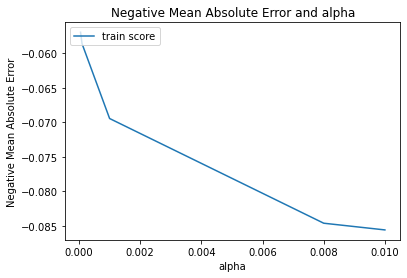

In [139]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [140]:
model_cv.best_params_

{'alpha': 5.0}

In [141]:
ridge = Ridge(alpha = 5)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9441842885600625
0.9249247546927695


In [142]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [143]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,11.643633
57,Neighborhood_Crawfor,0.123961
73,Neighborhood_StoneBr,0.078990
220,SaleCondition_Normal,0.077465
34,MSZoning_FV,0.076428
191,Functional_Typ,0.068463
221,SaleCondition_Partial,0.065903
146,Foundation_PConc,0.065330
16,BsmtFullBath,0.065152
4,OverallCond,0.064020


In [144]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9503671081191993
0.9226113799045597


# **Conclusion**

**For Ridge -**

* Best alpha value for Ridge : {'alpha': 5.0}
* R-squared (train) : 0.9441842885600625
* R-squared (test) : 0.9249247546927695
* RMSE : 0.01232538589911057

**For Lasso -**
* Best alpha value for Lasso : {'alpha': 0.0001}
* R-squared (train) : 0.9503671081191993
* R-squared (test) : 0.9226113799045597
* RMSE : 0.01270518135468683

In [159]:
# Top 5 Ridge Alpha Co-Efficient
ridge_coeff.head()

,Ridge Alpha Co-Efficient
Neighborhood_Crawfor,0.101732
SaleCondition_Normal,0.071787
OverallQual,0.067289
GrLivArea,0.064910
Neighborhood_StoneBr,0.060831


In [161]:
# Top 5 Lasso Alpha Co-Efficient
lasso_coeff.head()

,Lasso Alpha Co-Efficient
MSZoning_FV,0.411518
MSZoning_RL,0.369185
MSZoning_RH,0.344318
MSZoning_RM,0.338656
Neighborhood_Crawfor,0.164373


# **Subjective Questions - Demonstration**

### Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [148]:
# Building Ridge Model by doubling the value of alpha to 4
ridge_double = Ridge(alpha=10,random_state=100)
ridge_double.fit(X_train,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.9258694504771865
The MSE of the model on the test dataset for doubled alpha is 0.01217029163265093
The most important predictor variables are as follows:


,Ridge Doubled Alpha Co-Efficient
Neighborhood_Crawfor,0.101732
SaleCondition_Normal,0.071787
OverallQual,0.067289
GrLivArea,0.064910
Neighborhood_StoneBr,0.060831
Foundation_PConc,0.056440
Functional_Typ,0.056080
SaleCondition_Partial,0.053383
MSZoning_FV,0.052047
Condition1_Norm,0.051553


In [149]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_double = Lasso(alpha=0.0002,random_state=100)
lasso_double.fit(X_train,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.9263135997127908
The MSE of the model on the test dataset for doubled alpha is 0.012097373979125909
The most important predictor variables are as follows:


,Lasso Doubled Alpha Co-Efficient
MSZoning_FV,0.237814
MSZoning_RL,0.203854
MSZoning_RH,0.168271
MSZoning_RM,0.167057
Neighborhood_Crawfor,0.155627
GrLivArea,0.115767
SaleCondition_Partial,0.100004
Neighborhood_StoneBr,0.090456
SaleCondition_Normal,0.083943
Condition1_Norm,0.064707


### Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [153]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_mod = X_test.drop(['MSZoning_FV', 'MSZoning_RL', 'MSZoning_RH', 'MSZoning_RM', 'Neighborhood_Crawfor'],axis=1)
X_train_mod = X_train.drop(['MSZoning_FV', 'MSZoning_RL', 'MSZoning_RH', 'MSZoning_RM', 'Neighborhood_Crawfor'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_mod,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_mod)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_mod.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.9191648149014257
The MSE of the model on the test dataset is 0.01327101691760979
The most important predictor variables are as follows:


,Lasso Co-Efficient
Street_Pave,0.174286
SaleCondition_Partial,0.104069
GarageCond_Po,0.098124
Condition1_Norm,0.077963
SaleCondition_Normal,0.076450
